In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
# Read in Project File
data = pd.read_csv('movies_metadata.csv')
# Drop Unknown Values
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 0 to 45463
Data columns (total 7 columns):
genre1                  23190 non-null object
genre2                  23190 non-null object
production_companies    23190 non-null object
runtime                 23190 non-null float64
title                   23190 non-null object
vote_average            23190 non-null float64
vote_count              23190 non-null float64
dtypes: float64(3), object(4)
memory usage: 1.4+ MB


In [4]:
# Drop the movies with less than 250 votes and a score less than 6
data=data[data['vote_count']>250.0]
data=data[data['vote_average']>6]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 45265
Data columns (total 7 columns):
genre1                  2072 non-null object
genre2                  2072 non-null object
production_companies    2072 non-null object
runtime                 2072 non-null float64
title                   2072 non-null object
vote_average            2072 non-null float64
vote_count              2072 non-null float64
dtypes: float64(3), object(4)
memory usage: 129.5+ KB


In [7]:
# Apply label Encoding to Genres 1 and 2
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data[['genre1']] = data[['genre1']].apply(le.fit_transform)
data[['genre2']] = data[['genre2']].apply(le.fit_transform)

data

genre1  genre2            production_companies  runtime  \
0           2       3         Pixar Animation Studios     81.0   
1           1       8                TriStar Pictures    104.0   
5           0       4             Regency Enterprises    170.0   
9           1       0                  United Artists    130.0   
12          7       2              Universal Pictures     78.0   
...       ...     ...                             ...      ...   
44632       0      15  Denver and Delilah Productions    115.0   
44678       0       6                          Canal+    107.0   
44842       0      14              Paramount Pictures    149.0   
45174       6       4                      Bold Films    121.0   
45265       3       6                          Motlys    118.0   

                               title  vote_average  vote_count  
0                          Toy Story           7.7      5415.0  
1                            Jumanji           6.9      2413.0  
5                               Heat           7.7      1886.0  
9                          GoldenEye           6.6      1194.0  
12                             Balto           7.1       423.0  
...                              ...           ...         ...  
44632                  Atomic Blonde           6.1       748.0  
44678                        Dunkirk           7.5      2712.0  
44842  Transformers: The Last Knight           6.2      1440.0  
45174                    Shot Caller           6.9       324.0  
45265                  Force Majeure           6.8       255.0  

[2072 rows x 7 columns]

In [9]:
#Scaling the data so that the features of interest become comparable.

from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA

# Standard Scaler
scaler = StandardScaler()
X = data[['genre1', 'genre2','runtime', 'vote_average', 'vote_count']]
X_scaled = scaler.fit_transform(X)


# Applying Principle Component Analysis (PCA)
pca = PCA(n_components=2)
X_prin = pca.fit_transform(X_scaled)
X_prin = pd.DataFrame(X_prin) 
#data1
X_prin.columns=['P1','P2']
X = X_prin
X.head()

P1        P2
0  1.945506 -1.204421
1  0.320227 -0.598980
2  2.260486 -0.299210
3  0.242239 -1.529976
4 -0.731532 -0.551941

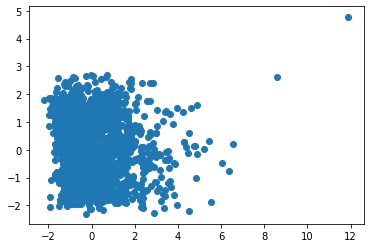

In [10]:
# Visualize the PCA 
fig, ax = plt.subplots()
x1 = X_prin['P1']
x2 = X_prin['P2']
scatter = ax.scatter(x1,x2)

In [14]:
# Apply Clustering 

from sklearn.cluster import KMeans, MeanShift, DBSCAN, AgglomerativeClustering

#Kmeans 

data['km pred'] = KMeans().fit_predict(X)

#Meanshift
data['ms pred'] = MeanShift().fit_predict(X)

#DBSCAN
data['db pred'] = DBSCAN().fit_predict(X)

#AgglomerativeClustering 
data['ac pred'] = AgglomerativeClustering().fit_predict(X)

data.head()

genre1  genre2     production_companies  runtime      title  vote_average  \
0        2       3  Pixar Animation Studios     81.0  Toy Story           7.7   
1        1       8         TriStar Pictures    104.0    Jumanji           6.9   
5        0       4      Regency Enterprises    170.0       Heat           7.7   
9        1       0           United Artists    130.0  GoldenEye           6.6   
12       7       2       Universal Pictures     78.0      Balto           7.1   

    vote_count  km pred  ms pred  db pred  ac pred  
0       5415.0        1        0        0        1  
1       2413.0        5        0        0        0  
5       1886.0        1        0        0        1  
9       1194.0        7        0        0        0  
12       423.0        2        0        0        0

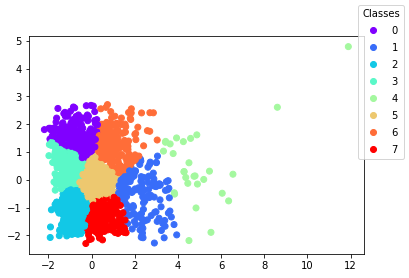

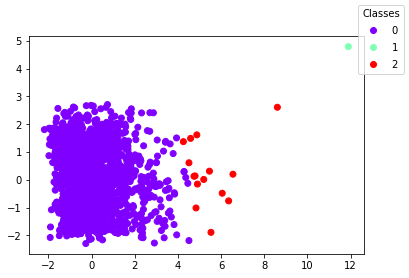

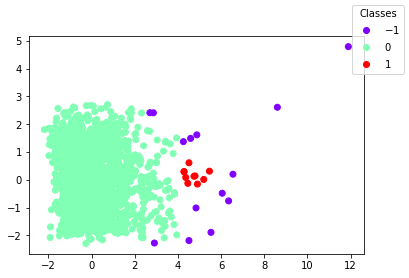

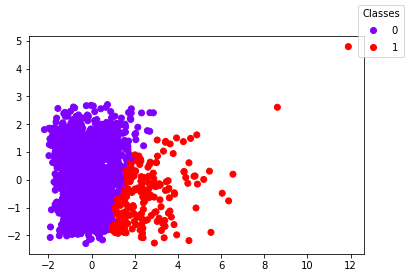

In [15]:
# Visualize the Clusters
for i in range(-4,0): 
    fig, ax = plt.subplots()
    scatter = ax.scatter(X['P1'], X['P2'], c= data.iloc[:,i], cmap='rainbow')
    legend = fig.legend(*scatter.legend_elements(), loc='upper right', title = 'Classes')
    


In [17]:
# Analyse the Clusters using silhoutte and david bouldin 
from sklearn.metrics import silhouette_score, davies_bouldin_score
best_sil = []
best_dav = []
print(silhouette_score(X_prin, data['km pred']), davies_bouldin_score(X_prin, data['km pred']))
best_sil.append(silhouette_score(X_prin, data['km pred']))
best_dav.append(davies_bouldin_score(X_prin, data['km pred']))

print(silhouette_score(X_prin, data['ms pred']), davies_bouldin_score(X_prin, data['ms pred']))
best_sil.append(silhouette_score(X_prin, data['ms pred']))
best_dav.append(davies_bouldin_score(X_prin, data['ms pred']))

print(silhouette_score(X_prin, data['db pred']), davies_bouldin_score(X_prin, data['db pred']))
best_sil.append(silhouette_score(X_prin, data['db pred']))
best_dav.append(davies_bouldin_score(X_prin, data['db pred']))

print(silhouette_score(X_prin, data['ac pred']), davies_bouldin_score(X_prin, data['ac pred']))
best_sil.append(silhouette_score(X_prin, data['ac pred']))
best_dav.append(davies_bouldin_score(X_prin, data['ac pred']))

print('\nThe best Silhouette score is', max(best_sil), "generated using Mean Shift method.")
print('\nThe best Davis score is', min(best_dav), "generated using Mean Shift method.")

0.3531070610382626 0.8719223317048832
0.6426567399419172 0.37001561609829997
0.5803089958537929 2.521627118116569
0.46140619779443154 0.8801463285812821

The best Silhouette score is 0.6426567399419172 generated using Mean Shift.

The best Davies score is 0.37001561609829997 generated using Mean Shift.


In [20]:
for i in range(2,20):
    data['km pred']=KMeans(n_clusters=i).fit_predict(X)
    print(silhouette_score(X, data['km pred']), davies_bouldin_score(X, data['km pred']))
print("The best number of clusters based on the silhoutte score is 2.")
    

0.3900275112351334 1.1215835204825397
0.38633667490339224 0.8844505879206562
0.3794722814201137 0.8931736223184168
0.37196292271922815 0.8705575638469837
0.36054185271555406 0.869456700080456
0.35284306091649026 0.8538296175476017
0.35620727533450464 0.8643940089208494
0.35272086336798514 0.8554664506324087
0.36406278312115725 0.8366315710969872
0.35911234754375826 0.8296037004157747
0.3603180981032301 0.8083802333102746
0.3584395172452199 0.7869724998731248
0.35124047842861544 0.8077315064883761
0.36124166049136397 0.8005639458224607
0.3641295883654562 0.7943472185339389
0.35909984675289003 0.8033809875899011
0.36487989028371776 0.8145574618753242
0.3709895283076771 0.7769920360278076
The best number of clusters based on the silhoutte score is 2.
